<a href="https://colab.research.google.com/github/martinpovolny/colaboratory/blob/master/hidden_layer_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title imports {display-mode: "form"}

import numpy as np 
import pylab as plt 
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Sample data

2 circles with common center

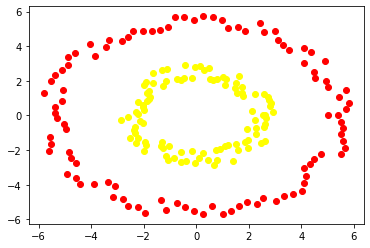

In [4]:
#@title generate sample data {display-mode: "form"}

num_samples = 100
theta = np.linspace(0, 2*np.pi, num_samples)
r = np.random.rand((num_samples))+5
x, y = r * np.cos(theta), r * np.sin(theta)

theta2 = np.linspace(0, 2*np.pi, num_samples)
r2 = np.random.rand((num_samples))+2
x2, y2 = r2 * np.cos(theta), r2 * np.sin(theta2)


plt.scatter(x, y, color='red')
plt.scatter(x2, y2, color='yellow')





In [5]:
#@title create a dataframe of sample data {display-mode: "form"}

df = pd.DataFrame({
    'x1': np.concatenate((x, x2)), 
    'x2': np.concatenate((y, y2)),
    'klass': np.concatenate((
    np.ones((num_samples)), 
    np.zeros((num_samples))
    ))
    }) 
df.head()


,x1,x2,klass
0,5.389411,0.000000,1.0
1,5.694011,0.361865,1.0
2,5.799283,0.740100,1.0
3,5.454185,1.051208,1.0
4,5.716044,1.483108,1.0


# 2 layer NN with variable number of neurons in the hiddel layer

This example shows the effect of number of neurons in the hidden layer on the ability of the network to learn how to separate the data.

The example dataset is not linearly separable. The network need to learn a more complex boundary.

How many neurons are needed for that?

Below you can see: 
 * a summary of the model architecture,
 * then a confusion matrix for predictions made by the model once it it learned,
 * finally a graphical representation of the prediction to compare with the chart in the Sample data above.

 Move the slider to adjust the number of neurons in the hidden layer.



In [0]:
def build_nn(number_hiden):
  model = Sequential()    
  model.add(Dense(number_hiden, activation='sigmoid', input_shape=(2,)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam')
  model.summary()

  return model

In [0]:
def run_experiment(hidden_neurons):
    m = build_nn(hidden_neurons)

    m.fit( df[['x1', 'x2']], df[['klass']], epochs=300, verbose=0)
    predicted = m.predict_classes(df[['x1', 'x2']])
    #print(predicted)

    confusion = tf.math.confusion_matrix(df['klass'], predicted, num_classes=2)
    print("Confusion matrix:\n")
    tf.print(confusion)

    class1 = df[predicted == 1]
    class0 = df[predicted == 0]

    f = plt.figure()
    f.clear()
    plt.scatter(class1[['x1']], class1[['x2']], color='red')
    plt.scatter(class0[['x1']], class0[['x2']], color='yellow')
    plt.close(f)
    display(f)



In [0]:
#@title create a slider widget that runs the experiment {display-mode: "form"}

output_hidd = widgets.Output()

hidd_slider = widgets.IntSlider(
    value=7,
    min=1,
    max=12,
    step=1,
    description='Hidden neurons:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def hidd_change_handler(change):
  output_hidd.clear_output()

  with output_hidd:
    run_experiment(change.new)

hidd_slider.observe(hidd_change_handler, names='value')

#run_experiment(change.new)


# Run the experiment

In [11]:
display(hidd_slider)
display(output_hidd)

IntSlider(value=7, continuous_update=False, description='Hidden neurons:', max=12, min=1)

Output()